___

In [1]:
# Import libraries to be used

# Warning messages display
# import warnings
# warnings.filterwarnings(action='once') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
%load_ext memory_profiler

In [3]:
t0 = time.perf_counter() 

In [4]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


## 1. Load the dataset

In [5]:
cols = [
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'OP_UNIQUE_CARRIER',
 'ORIGIN',
#  'WBAN_Origin_OTP', # Redundant having the 'ORIGIN' feature
 'DEST',
#  'WBAN_Dest_OTP', # Redundant having the 'DEST' feature
 'DEP_TIME_hour',
 'TAXI_OUT_median',
 'TAXI_IN_median',
 'ARR_TIME_hour',
 'CRS_ELAPSED_TIME',
 'DISTANCE',
#  'DISTANCE_GROUP', # Redundant having the 'DISTANCE' feature
#  'STATION_Origin', # Redundant having the 'ORIGIN' feature
#  'WMO_Origin', # Redundant having the 'ORIGIN' feature
#  'WBAN_Origin_LCD', # Redundant having the 'ORIGIN' feature
 'HourlyAltimeterSetting_Origin',
 'HourlyDryBulbTemperature_Origin',
 'HourlyPrecipitation_Origin',
 'HourlyRelativeHumidity_Origin',
 'HourlySkyConditions_Origin',
 'HourlyVisibility_Origin',
#  'REM_Origin', # Not relevant for the model
#  'STATION_Dest', # Redundant having the 'DEST' feature
#  'WMO_Dest', # Redundant having the 'DEST' feature
#  'WBAN_Dest_LCD', # Redundant having the 'DEST' feature
 'HourlyAltimeterSetting_Dest',
 'HourlyDryBulbTemperature_Dest',
 'HourlyPrecipitation_Dest',
 'HourlyRelativeHumidity_Dest',
 'HourlySkyConditions_Dest',
 'HourlyVisibility_Dest',
#  'REM_Dest', # Redundant having the 'ORIGIN' feature
 'ARR_DEL15' # → Target !!
]

In [6]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT-NOAA",
                                           "OTP_LCD_allColumns.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT-NOAA\\OTP_LCD_allColumns.csv'

In [7]:
%%time

df_all = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
                     usecols=cols,
                     dtype={
                            'MONTH' : 'category',
                            'DAY_OF_MONTH' : 'category',
                            'DAY_OF_WEEK' : 'category',
                            'OP_UNIQUE_CARRIER' : 'category',
                            'ORIGIN' : 'string',
                            'DEST' : 'string',
                            'DEP_TIME_hour' : 'category',
                            'TAXI_OUT_median' : 'int32',
                            'TAXI_IN_median' : 'int32',
                            'ARR_TIME_hour' : 'category',
                            'CRS_ELAPSED_TIME' : 'int32',
                            'DISTANCE' : 'int32',
                            'HourlyAltimeterSetting_Origin' : 'float32',
                            'HourlyDryBulbTemperature_Origin' : 'float32',
                            'HourlyPrecipitation_Origin' : 'float32',
                            'HourlyRelativeHumidity_Origin' : 'float32',
                            'HourlySkyConditions_Origin' : 'category',
                            'HourlyVisibility_Origin' : 'float32',
                            'HourlyAltimeterSetting_Dest' : 'float32',
                            'HourlyDryBulbTemperature_Dest' : 'float32',
                            'HourlyPrecipitation_Dest' : 'float32',
                            'HourlyRelativeHumidity_Dest' : 'float32',
                            'HourlySkyConditions_Dest' : 'category',
                            'HourlyVisibility_Dest' : 'float32',
                            'ARR_DEL15' : 'int32'
                           }
                    )
df_all.sample(5)

Wall time: 47.2 s


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_DEL15,ARR_TIME_hour,CRS_ELAPSED_TIME,DISTANCE,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest
4332790,12,18,3,WN,BNA,TPA,13,10,4,0,16,100,612,30.340000,35.0,0.0,67.0,BKN,10.00,30.059999,61.0,0.0,52.0,(missing),9.94
1446910,06,19,3,NK,SAN,LAS,6,14,7,0,7,87,258,29.990000,63.0,0.0,75.0,OVC,10.00,29.920000,90.0,0.0,13.0,CLR,10.00
2012756,09,02,1,DL,MCO,SLC,19,16,6,0,21,277,1931,29.790001,82.0,0.0,77.0,(missing),9.94,30.080000,85.0,0.0,15.0,BKN,10.00
2980102,11,29,5,NK,EWR,TPA,12,16,6,0,14,169,997,30.180000,41.0,0.0,43.0,BKN,10.00,30.090000,82.0,0.0,27.0,SCT,10.00
1800723,08,26,1,AA,TUS,DFW,9,12,12,0,14,140,813,30.010000,90.0,0.0,44.0,CLR,10.00,29.670000,101.0,0.0,37.0,CLR,10.00


___

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200051 entries, 0 to 7200050
Data columns (total 25 columns):
 #   Column                           Dtype   
---  ------                           -----   
 0   MONTH                            category
 1   DAY_OF_MONTH                     category
 2   DAY_OF_WEEK                      category
 3   OP_UNIQUE_CARRIER                category
 4   ORIGIN                           string  
 5   DEST                             string  
 6   DEP_TIME_hour                    category
 7   TAXI_OUT_median                  int32   
 8   TAXI_IN_median                   int32   
 9   ARR_DEL15                        int32   
 10  ARR_TIME_hour                    category
 11  CRS_ELAPSED_TIME                 int32   
 12  DISTANCE                         int32   
 13  HourlyAltimeterSetting_Origin    float32 
 14  HourlyDryBulbTemperature_Origin  float32 
 15  HourlyPrecipitation_Origin       float32 
 16  HourlyRelativeHumidity_Origin    flo

In [9]:
# from pandas_profiling import ProfileReport

# # # Complete report:
# # prof = ProfileReport(df_all)
# # prof.to_file('informe.html')

# # Sample report (more computationally efficient)
# prof = ProfileReport(df_all.sample(10000)) 
# prof.to_file('sample_report.html')

In [10]:
# from pandas_profiling import ProfileReport

# # Complete report:
# prof = ProfileReport(df_all, minimal=True)
# prof.to_file('complete_report.html')

# # # Sample report (more computationally efficient)
# # prof = ProfileReport(df_all.sample(10000)) 
# # prof.to_file('sample_report.html')

## 2. Dataset overview

In [11]:
# For the initial runs, define a reasonably-sized sample:
sample_length = int(1e4)

# The dataset is somehow imbalanced (80% on-time / 20% delayed), so let's perform some quick undersampling:
delayed = df_all[df_all['ARR_DEL15'] == 1].sample(sample_length // 2)
ontime = df_all[df_all['ARR_DEL15'] == 0].sample(sample_length // 2)
df = delayed.append(ontime)

# Get dummies for the categorical features:
df = pd.get_dummies(data=df, columns=df.select_dtypes('category').columns)

print("On-time flights: {:7d} ({:5.2f}%)".format(len(ontime), 100*len(ontime)/len(df)))
print("Delayed flights: {:7d} ({:5.2f}%)".format(len(delayed), 100*len(delayed)/len(df)))

On-time flights:    5000 (50.00%)
Delayed flights:    5000 (50.00%)


### Train / Test / Validation split
Break the dataset into three blocks:
1. Training (70%)
2. Test (15%)
3. Validation (15%)

In [12]:
def target_encoder(df, column, target, index=None, method='mean'):
    """
    Target-based encoding is numerization of a categorical variables via the target variable. Main purpose is to deal
    with high cardinality categorical features without exploding dimensionality. This replaces the categorical variable
    with just one new numerical variable. Each category or level of the categorical variable is represented by a
    summary statistic of the target for that level.
    Args:
        df (pandas df): Pandas DataFrame containing the categorical column and target.
        column (str): Categorical variable column to be encoded.
        target (str): Target on which to encode.
        index (arr): Can be supplied to use targets only from the train index. Avoids data leakage from the test fold
        method (str): Summary statistic of the target. Mean, median or std. deviation.
    Returns:
        arr: Encoded categorical column.
    """

    index = df.index if index is None else index # Encode the entire input df if no specific indices is supplied

    if method == 'mean':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].mean())
    elif method == 'median':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].median())
    elif method == 'std':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].std())
    else:
        raise ValueError("Incorrect method supplied: '{}'. Must be one of 'mean', 'median', 'std'".format(method))

    return encoded_column

In [13]:
# Divide the data:
train_idx = df.sample(frac=0.7).index
df['ORIGIN_Encoded'] = target_encoder(df_all, column='ORIGIN', target='ARR_DEL15', index=train_idx, method='mean')
df['DEST_Encoded'] = target_encoder(df_all, column='DEST', target='ARR_DEL15', index=train_idx, method='mean')
df.drop(['ORIGIN', 'DEST'], axis=1, inplace=True)
# df['ORIGIN_Encoded'] = target_encoder(df_all, column='ORIGIN', target='ARR_DEL15', method='mean')
# df['DEST_Encoded'] = target_encoder(df_all, column='DEST', target='ARR_DEL15', method='mean')
train = df.loc[train_idx, :]
test_valid = df.drop(train.index)
test = test_valid.sample(frac=0.5)
valid = test_valid.drop(test.index)

print("Total dataset:      {:7d} ({:6.2f}%)".format(len(df), 100*len(df)/len(df)))
print("Training dataset:   {:7d} ( {:5.2f}%)".format(len(train), 100*len(train)/len(df)))
print("Test dataset:       {:7d} ( {:5.2f}%)".format(len(test), 100*len(test)/len(df)))
print("Validation dataset: {:7d} ( {:5.2f}%)".format(len(valid), 100*len(valid)/len(df)))

Total dataset:        10000 (100.00%)
Training dataset:      7000 ( 70.00%)
Test dataset:          1500 ( 15.00%)
Validation dataset:    1500 ( 15.00%)


# XGBoost

In [14]:
from xgboost import XGBClassifier

In [15]:
# Train / Test partition:
X_train, y_train = train.drop("ARR_DEL15", axis=1), train["ARR_DEL15"]
X_test, y_test = test.drop("ARR_DEL15", axis=1), test["ARR_DEL15"]

# Validation:
X_valid, y_valid = valid.drop("ARR_DEL15", axis=1), valid["ARR_DEL15"]

In [16]:
# Basic model definition:
xgb_model = XGBClassifier(use_label_encoder=False,
                          verbosity=1,
                          random_state=0,
                          num_boost_round=500,
                          as_pandas=True,
                          early_stopping_rounds=10)

## GridSearchCV

In [17]:
# Parameter grid:
parameters = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],   
            "learning_rate":[0.0001, 0.001, 0.01, 0.1],    
            'max_depth': [3, 4, 5, 6],
            "objective": ["binary:logistic"],
            "booster":["gbtree"],
            "tree_method":['auto']
             }

In [18]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

# clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
#                    cv=StratifiedKFold(n_splits=5, shuffle=True), 
#                    scoring='f1', refit=True)

clf = RandomizedSearchCV(xgb_model, parameters, n_jobs=5, 
                         cv=StratifiedKFold(n_splits=5, shuffle=True), 
                         scoring='f1', refit=True, n_iter=10)

clf.fit(X_train, y_train, eval_metric='logloss')

print("Scorer:", clf.scorer_)
print("Best score:", clf.best_score_)
print("Best parameters:", clf.best_params_)
print("Best estimator:", clf.best_estimator_)
# print("CV results:", clf.cv_results_)

[19:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { as_pandas, early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Scorer: make_scorer(f1_score, average=binary)
Best score: 0.6440814891514266
Best parameters: {'tree_method': 'auto', 'subsample': 1.0, 'objective': 'binary:logistic', 'min_child_weight': 10, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 1.0, 'booster': 'gbtree'}
Best estimator: XGBClassifier(as_pandas=True, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=10, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
  

## Evaluation

In [19]:
# Evaluate the model's metrics:

from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score, \
                            confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve

def clf_metrics(classifier, y_test, y_pred):
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Normalized confusion matrix:\n", confusion_matrix(y_test, y_pred, normalize='true'), '\n')
    print(classification_report(y_test, y_pred, target_names=['on-time', 'delayed']))
    print("F-beta (ß=2) = {:6.3f}".format(fbeta_score(y_test, y_pred, beta=2)))   
    print("F1 =           {:6.3f}".format(f1_score(y_test, y_pred)))   
    print("Recall =       {:6.3f}".format(recall_score(y_test, y_pred)))   
    print("Precision =    {:6.3f}".format(precision_score(y_test, y_pred)))   
    print("Accuracy =     {:6.3f}".format(accuracy_score(y_test, y_pred)))

### Test

In [20]:
probabilities = clf.predict_proba(X_test)[:,1]
probabilities

array([0.40912527, 0.7497668 , 0.51237416, ..., 0.52884066, 0.33549032,
       0.69858724], dtype=float32)

In [21]:
y_pred = [1 if i > .5 else 0 for i in probabilities] # '.5' representa el threshold
y_pred[:10]

[0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

In [22]:
clf_metrics(clf, y_test, y_pred)

Confusion matrix:
 [[444 281]
 [324 451]]
Normalized confusion matrix:
 [[0.61241379 0.38758621]
 [0.41806452 0.58193548]] 

              precision    recall  f1-score   support

     on-time       0.58      0.61      0.59       725
     delayed       0.62      0.58      0.60       775

    accuracy                           0.60      1500
   macro avg       0.60      0.60      0.60      1500
weighted avg       0.60      0.60      0.60      1500

F-beta (ß=2) =  0.588
F1 =            0.599
Recall =        0.582
Precision =     0.616
Accuracy =      0.597


In [23]:
fpr, tpr, _ = roc_curve(y_test,  probabilities)
auc = roc_auc_score(y_test, probabilities)

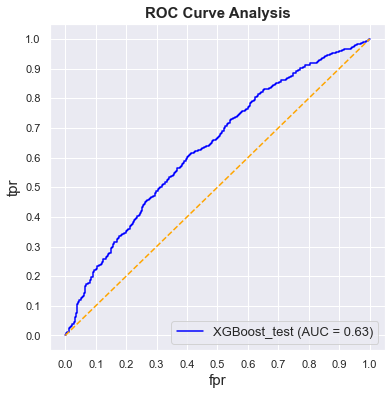

In [24]:
# Plot the figure:
fig, ax = plt.subplots(figsize=(6,6))

plot_roc_curve(clf, X_test, y_test, color='blue', ax=ax, name='XGBoost_test')
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("fpr", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("tpr", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

### Validation

In [25]:
probabilities_val = clf.predict_proba(X_valid)[:,1]
probabilities_val

array([0.19354649, 0.53022325, 0.5825815 , ..., 0.53383446, 0.26813018,
       0.5453111 ], dtype=float32)

In [26]:
y_val_pred = [1 if i > .5 else 0 for i in probabilities_val] # '.5' representa el threshold
y_val_pred[:10]

[0, 1, 1, 1, 1, 0, 1, 1, 1, 1]

In [27]:
clf_metrics(clf, y_valid, y_val_pred)

Confusion matrix:
 [[445 311]
 [314 430]]
Normalized confusion matrix:
 [[0.58862434 0.41137566]
 [0.42204301 0.57795699]] 

              precision    recall  f1-score   support

     on-time       0.59      0.59      0.59       756
     delayed       0.58      0.58      0.58       744

    accuracy                           0.58      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.58      0.58      0.58      1500

F-beta (ß=2) =  0.578
F1 =            0.579
Recall =        0.578
Precision =     0.580
Accuracy =      0.583


In [28]:
fpr, tpr, _ = roc_curve(y_valid,  probabilities_val)
auc = roc_auc_score(y_valid, probabilities_val)

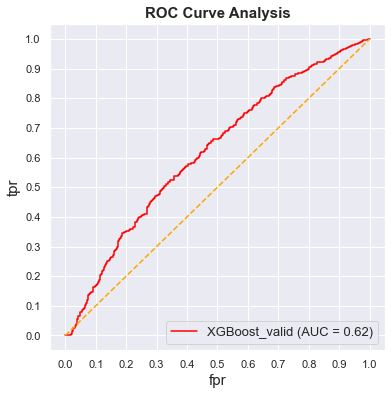

In [29]:
# Plot the figure:
fig, ax = plt.subplots(figsize=(6,6))

plot_roc_curve(clf, X_valid, y_valid, color='red', ax=ax, name='XGBoost_valid')
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("fpr", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("tpr", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

### Comparison

In [30]:
print("TEST dataset results")
clf_metrics(clf, y_test, y_pred)
print("-"*50)
print("VALIDATION dataset results")
clf_metrics(clf, y_valid, y_val_pred)

TEST dataset results
Confusion matrix:
 [[444 281]
 [324 451]]
Normalized confusion matrix:
 [[0.61241379 0.38758621]
 [0.41806452 0.58193548]] 

              precision    recall  f1-score   support

     on-time       0.58      0.61      0.59       725
     delayed       0.62      0.58      0.60       775

    accuracy                           0.60      1500
   macro avg       0.60      0.60      0.60      1500
weighted avg       0.60      0.60      0.60      1500

F-beta (ß=2) =  0.588
F1 =            0.599
Recall =        0.582
Precision =     0.616
Accuracy =      0.597
--------------------------------------------------
VALIDATION dataset results
Confusion matrix:
 [[445 311]
 [314 430]]
Normalized confusion matrix:
 [[0.58862434 0.41137566]
 [0.42204301 0.57795699]] 

              precision    recall  f1-score   support

     on-time       0.59      0.59      0.59       756
     delayed       0.58      0.58      0.58       744

    accuracy                           0.58      1

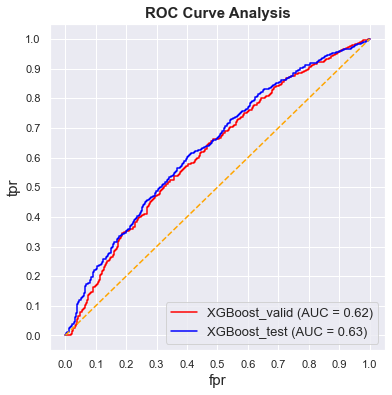

In [31]:
# Plot the figure:
fig, ax = plt.subplots(figsize=(6,6))

plot_roc_curve(clf, X_valid, y_valid, color='red', ax=ax, name='XGBoost_valid')
plot_roc_curve(clf, X_test, y_test, color='blue', ax=ax, name='XGBoost_test')
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("fpr", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("tpr", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

___

In [32]:
t1 = time.perf_counter() - t0
print("Time elapsed: {:2.0f}h {:2.0f}min {:2.0f}s".format(t1//3600, (t1%3600)//60, (t1%3600)%60))

Time elapsed:  0h  2min 15s


___